In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

# Sample Dataset

In [164]:
X = np.array([
    [-2, 4, 1],
    [4, 1, 1],
    [1, 6, 1],
    [2, 4, 1],
    [6, 2, 1],
])
y = np.array([-1,-1,1,1,1])

## SVM implementation

In [165]:
def run_svm(X, y, epochs=100, learning_rate=1):
    w = np.zeros(len(X[0]))
    length = len(X)
    errors = []
    for epoch in range(1, epochs):
        regularizer = 1 / float(epoch)
        err_count = 0
        for i in range(length):
            x = X[i]
            y_i = y[i]
            if((y_i * np.dot(x, w)) < 1):
                err_count = 1
                w += learning_rate * ((y_i * x) - (2 * regularizer * w))
            else:
                w += learning_rate * (- 2 * regularizer * w)
        errors.append(err_count)
        
    plt.plot(errors, '|', color='r')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    return w

## Visualize Errors decreasing over time

/Users/jeremiahbill/virtual_envs/keras_env/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


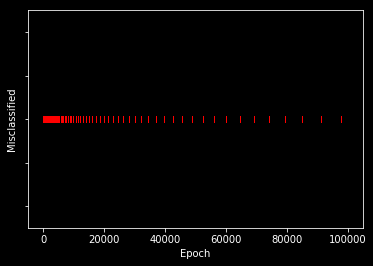

In [166]:
w = run_svm(X, y, epochs=100000, learning_rate=1)

## Derive equation of line from weight vector

In [167]:
w1 = w[0]
w2 = w[1]
w3 = w[2]
print('{} {} {}'.format(w1, w2, w3))
m = - (w3 / w2) / ( w3/ w1)
b = - (w3 / w2)
x_plane = np.arange(-3,7)
y_plane = np.array([(x * m) + b for x in x_plane])

1.5887611677029299 3.174580551480781 -11.118631048904986


## Results

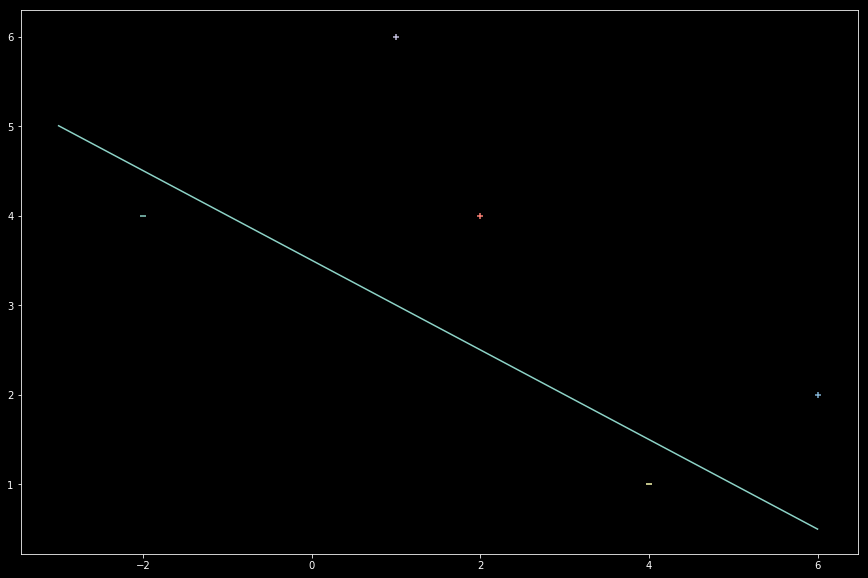

In [169]:
f, ax = plt.subplots(figsize=(15, 10))
for i, x in enumerate(X):
    if(y[i] < 1):
        ax.scatter(x[0], x[1], marker='_')
    else:
        ax.scatter(x[0], x[1], marker='+')
ax.plot(x_plane, y_plane)
plt.show()